# **Decision Tree Regression**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from keras.layers import Dense, SimpleRNN, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("Customer-Purchase-History.csv")
df.head()

,CustomerID,Product,PurchaseDate,Quantity,UnitPrice,CustomerName,ProductCategory,PaymentMethod,ReviewRating,TotalPrice
0,C5361,Phone,2024-03-05,8,618.83,Customer C5361,Office Supplies,Cash,1,4950.64
1,C6231,Laptop,2025-06-21,7,366.22,Customer C6231,Electronics,Debit Card,3,2563.54
2,C7704,Chair,2023-06-25,5,634.51,Customer C7704,Office Supplies,Credit Card,4,3172.55
3,C2923,Printer,2023-09-30,3,508.63,Customer C2923,Office Supplies,Gift Card,1,1525.89
4,C4847,Monitor,2023-04-03,4,452.06,Customer C4847,Electronics,Credit Card,2,1808.24


**2.Machine Learning Regression:**

In [3]:
X = df[['Quantity', 'UnitPrice', 'ReviewRating']]
X 

,Quantity,UnitPrice,ReviewRating
0,8,618.83,1
1,7,366.22,3
2,5,634.51,4
3,3,508.63,1
4,4,452.06,2
...,...,...,...
1795,3,13.08,4
1796,4,323.03,2
1797,5,129.86,3
1798,3,493.15,5


In [4]:
y = df['TotalPrice']
y

0       4950.64
1       2563.54
2       3172.55
3       1525.89
4       1808.24
         ...   
1795      39.24
1796    1292.12
1797     649.30
1798    1479.45
1799    2736.02
Name: TotalPrice, Length: 1800, dtype: float64

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
def calc_metrics(y_test, y_pred):
    MAE = mean_absolute_error(y_test, y_pred)
    print("MAE:", MAE)
    MSE = mean_squared_error(y_test, y_pred)
    print("MSE:", MSE)
    RMSE = np.sqrt(MSE)
    print("RMSE:", RMSE)
    R2 = r2_score(y_test, y_pred)
    print("R2:", R2)
    return MAE, MSE, RMSE, R2 

**Decision Tree Regression**

In [7]:
reg = DecisionTreeRegressor(max_depth=4, random_state=42)
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)


In [8]:
calc_metrics(y_test, y_pred)

MAE: 244.64063912382295
MSE: 112319.04902592741
RMSE: 335.1403422835386
R2: 0.9497620417632112


(244.64063912382295,
 112319.04902592741,
 np.float64(335.1403422835386),
 0.9497620417632112)

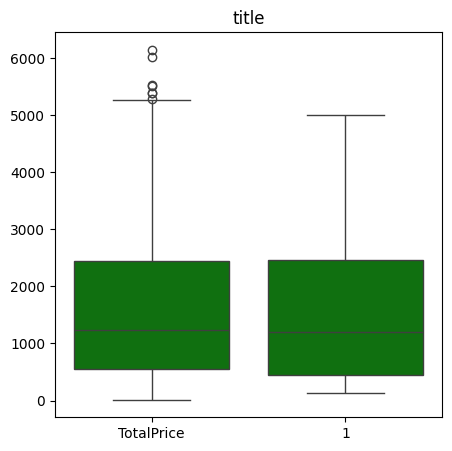

In [9]:
plt.figure(figsize=(5, 5))
sns.boxplot(data=[y_test, y_pred], color = 'green')
plt.title("title")
plt.show()